In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings('ignore')



step 1 : loading and checking the data completeness the data


In [ ]:
boom = pd.read_csv("/content/drive/MyDrive/Upgrad Dataset/day.csv")
boom.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
boom.shape

(730, 16)

In [ ]:
boom.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [ ]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
boom.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

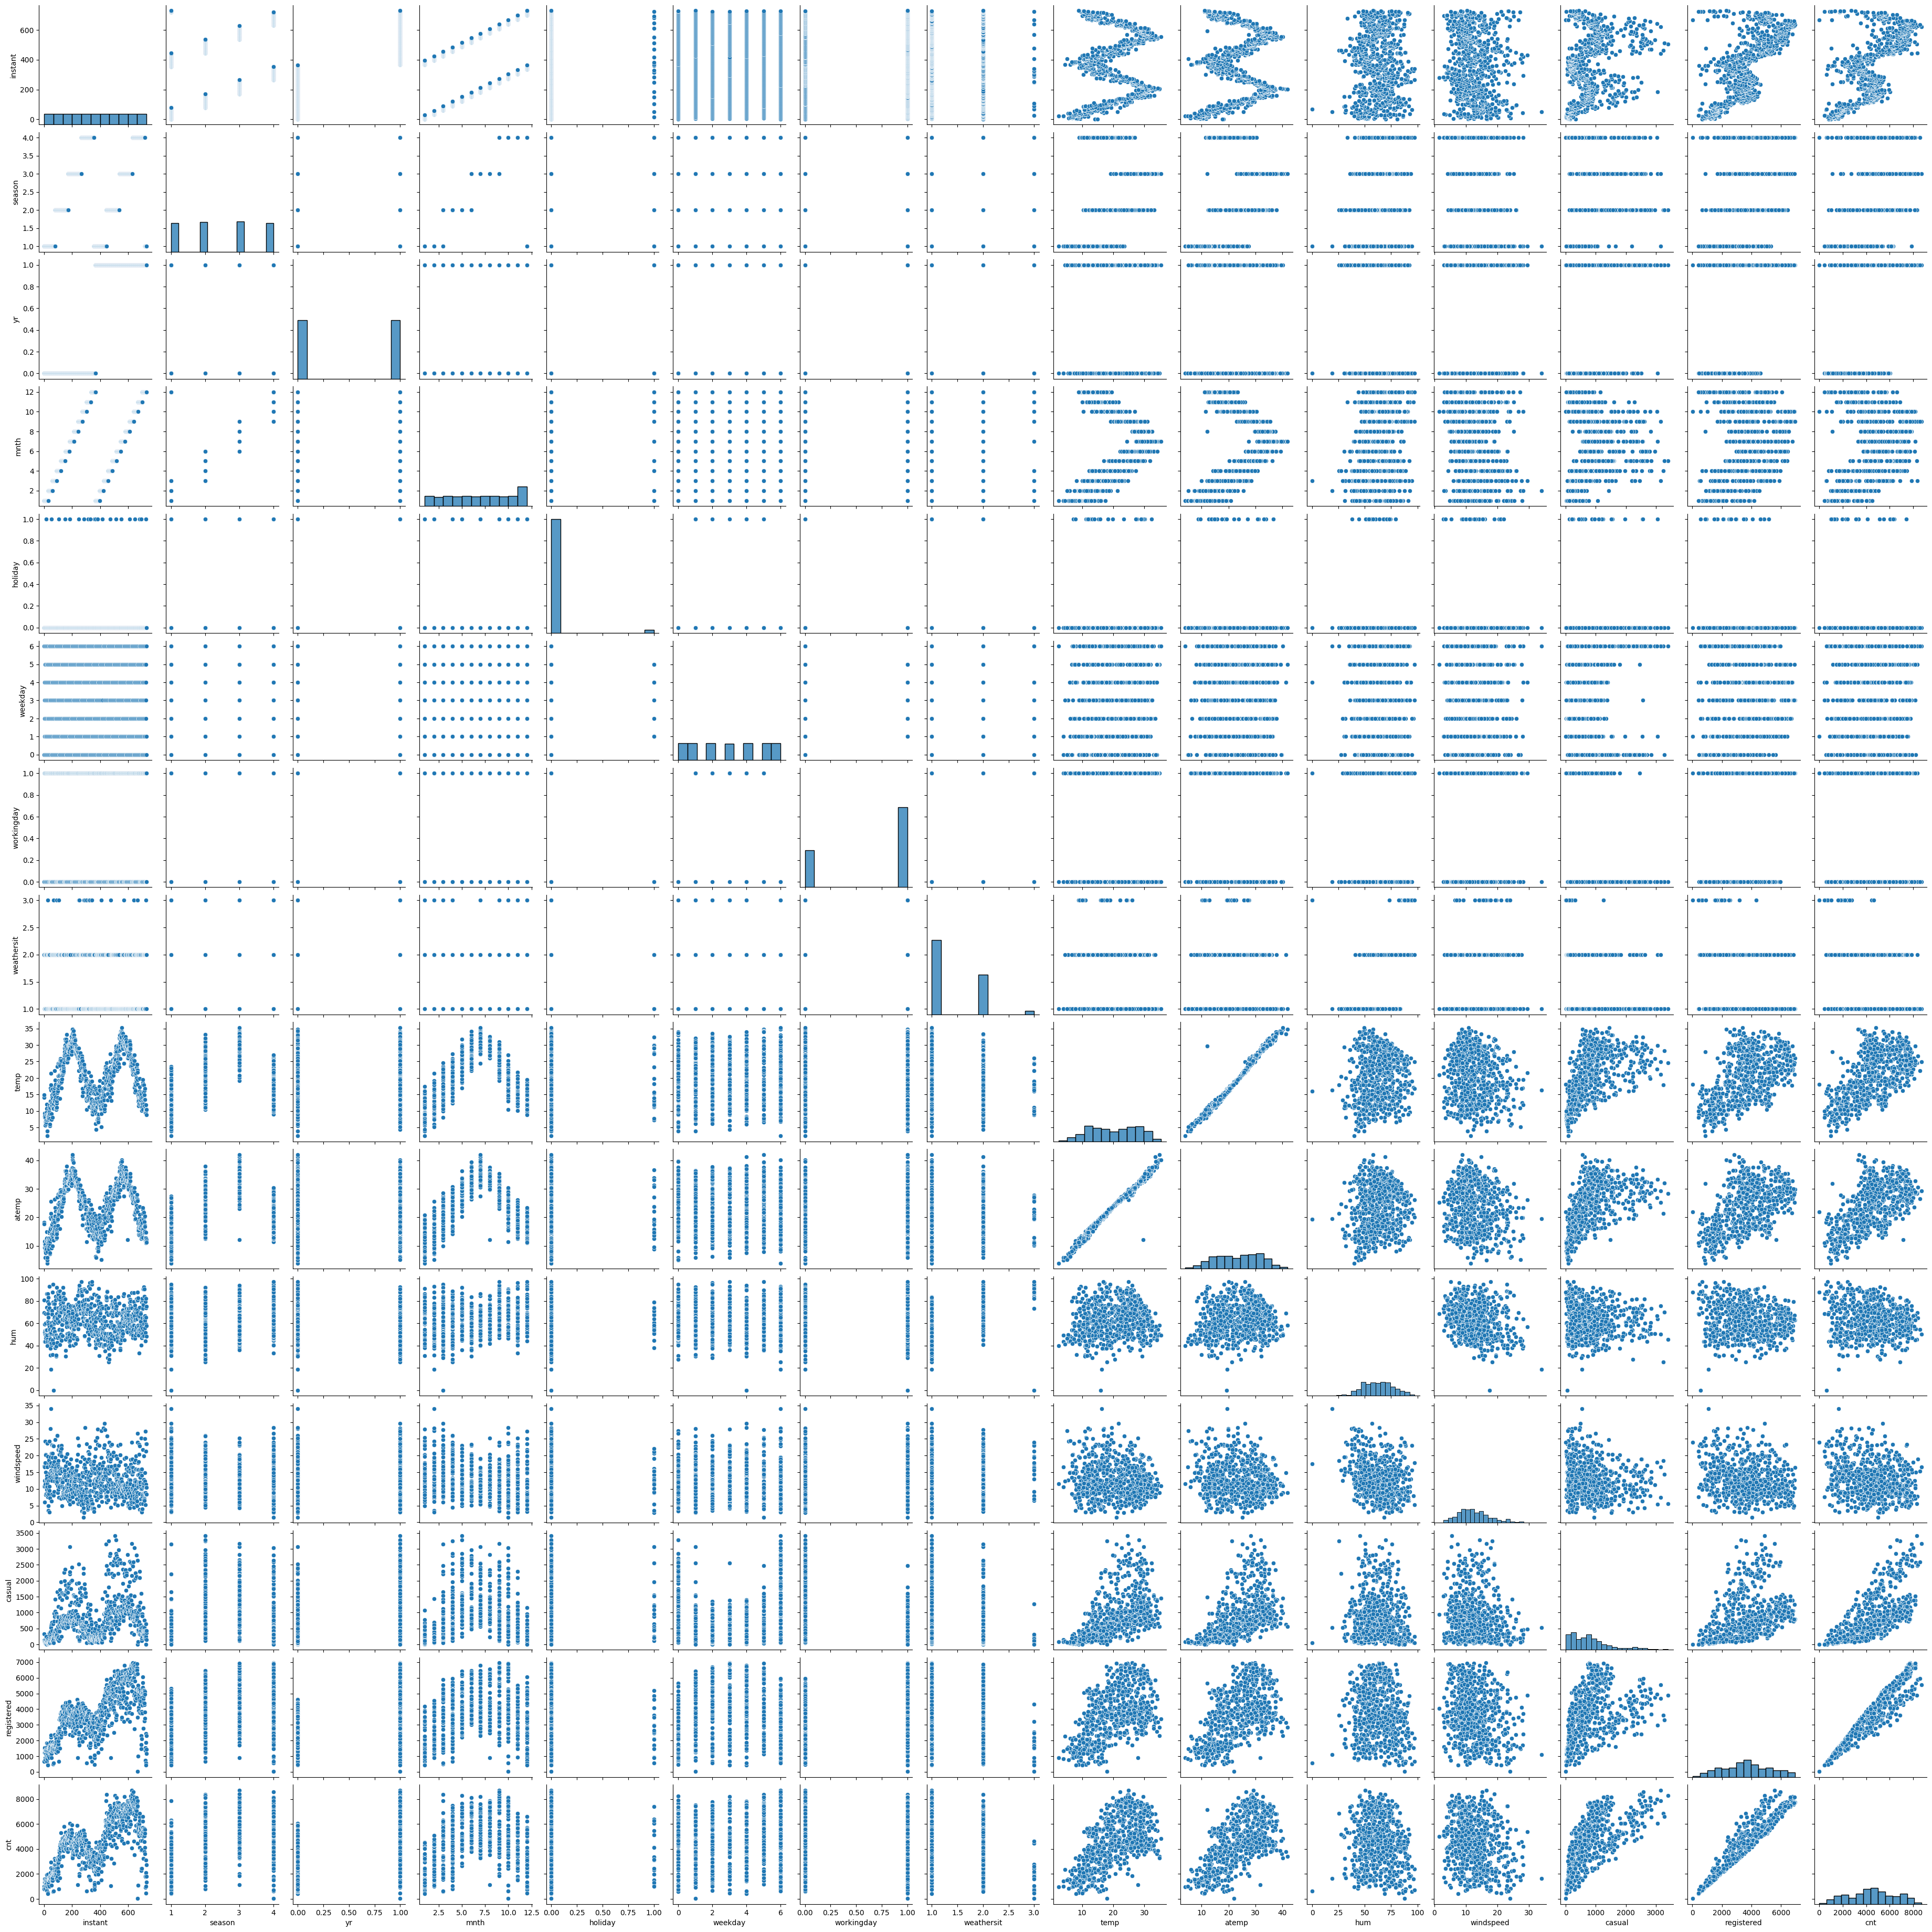

In [ ]:
#visualise numeric
sns.pairplot(boom)
plt.show()

it is clearily visible that there is multiple corelation

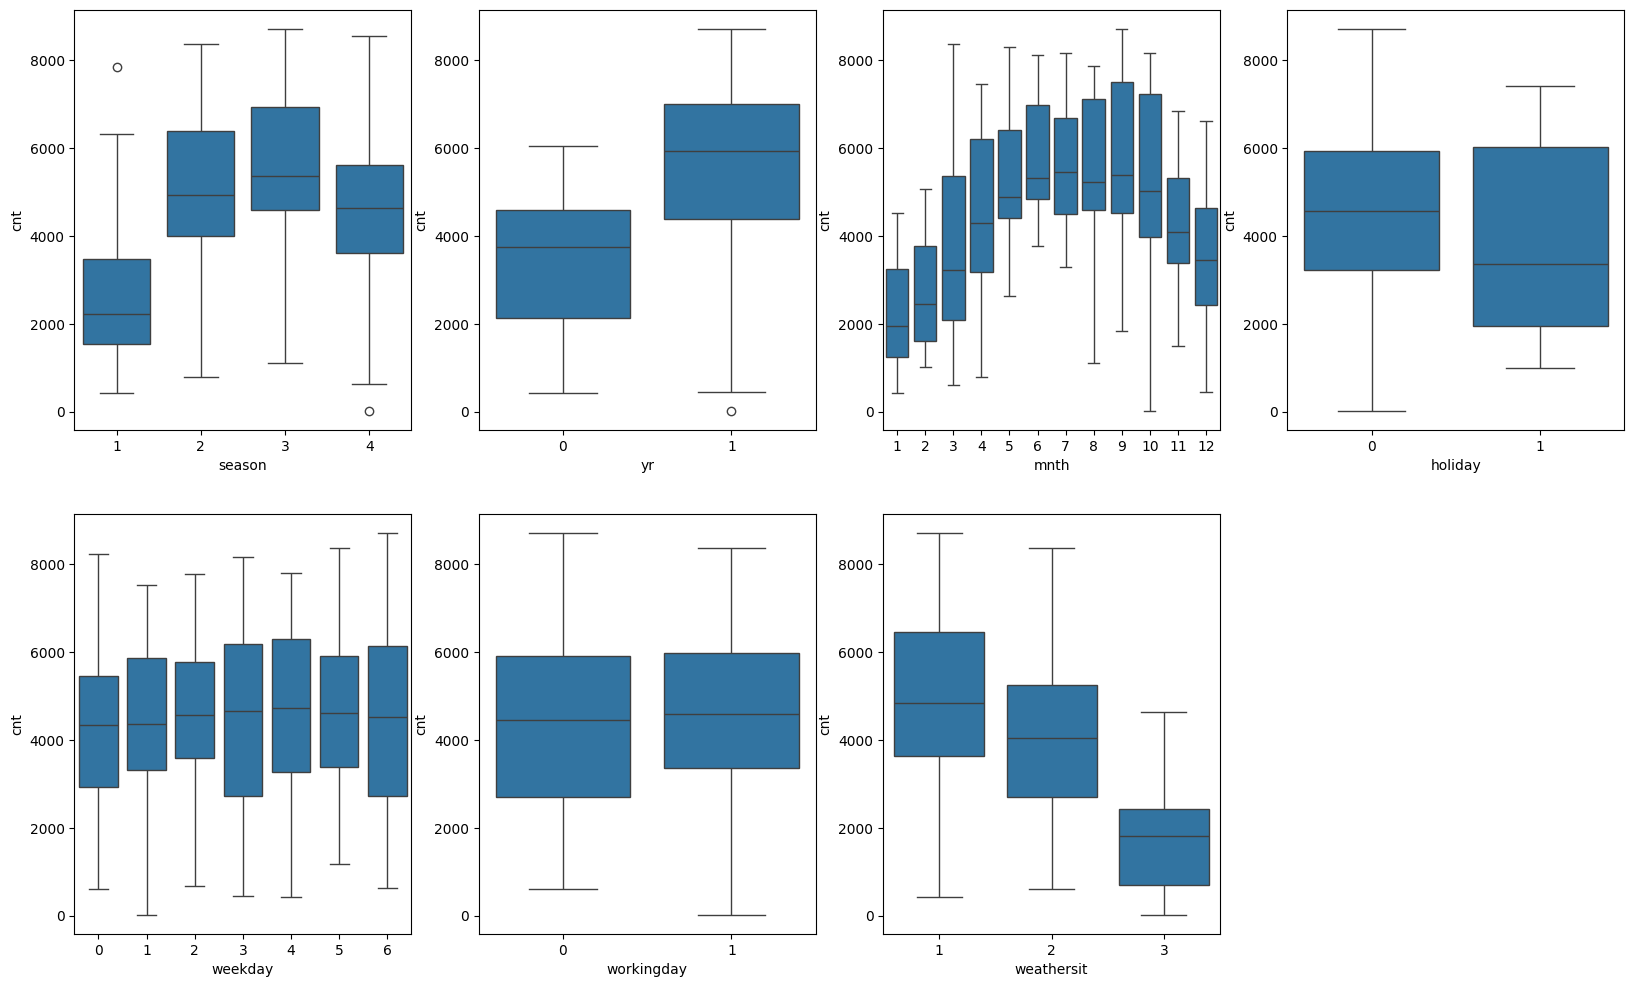

In [12]:
#visualizing the categorical variables of the dataset using boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=boom)
plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=boom)
plt.subplot(2, 4, 3)
sns.boxplot(x='mnth', y='cnt', data=boom)
plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y='cnt', data=boom)
plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y='cnt', data=boom)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=boom)
plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=boom)

plt.show()

- season : season (1:spring, 2:summer, 3:fall, 4:winter)

- yr : year (0: 2018, 1:2019)

- mnth : month ( 1 to 12)

- holiday : weather day is a holiday or not (extracted from http://dchr.
dc.gov/page/holiday-schedule)

- weekday : day of the week

- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog




As per the above mapping
- bike rental is least in spring when compaired with other seasons
- bike rental is more in 2019
- bike rental goes beyond 40000 from May to Nov
- more bikes are rented on a holiday
- most bikes are rented in middle of the week
- pattern of bike rental is same for working / non working day
- bike rental is high on a clear day, and no one rented bike on a rainy day.

Step 2 : data prepration

In [13]:
#droping the non useful columns from data set
boom.drop(['instant','atemp','casual','registered','dteday'], axis = 1, inplace = True)


In [14]:
# mapping the catagorical variables
boom['season']=boom.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom['mnth']=boom.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom['weekday']=boom.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
boom['weathersit']=boom.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

In [15]:
boom.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Sat           0  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Sun           0  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Mon           1          Clear   8.050924   
3  spring   0  Jan        0     Tue           1          Clear   8.200000   
4  spring   0  Jan        0     Wed           1          Clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [16]:
# creating dummy columns for catagorical variables with more than 2 categories
season_1 = pd.get_dummies(boom.season, drop_first=True)
mnth_1 = pd.get_dummies(boom.mnth, drop_first=True)
weekday_1 = pd.get_dummies(boom.weekday, drop_first=True)
weathersit_1 = pd.get_dummies(boom.weathersit, drop_first=True)

In [18]:
season_1.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [19]:
# concating the dummy columns to the main data set
boom = pd.concat([boom,season_1,mnth_1,weekday_1,weathersit_1], axis=1)
boom.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Sat           0  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Sun           0  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Mon           1          Clear   8.050924   
3  spring   0  Jan        0     Tue           1          Clear   8.200000   
4  spring   0  Jan        0     Wed           1          Clear   9.305237   

       hum  windspeed  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0  80.5833  10.749882  ...    0    0    0    1    0    0    0    0   
1  69.6087  16.652113  ...    0    0    0    0    1    0    0    0   
2  43.7273  16.636703  ...    0    0    1    0    0    0    0    0   
3  59.0435  10.739832  ...    0    0    0    0    0    0    1    0   
4  43.6957  12.522300  ...    0    0    0    0    0    0    0    1   

   Light Snow  Mist + Cloudy  
0           0              1  
1           0              1  
2           0              0  
3           0              0  
4           0              0  

[5 rows x 33 columns]

In [20]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
boom.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
boom.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           0  14.110847  80.5833  10.749882   985       1   
1   0        0           0  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Light Snow  \
0       0       0  ...    0    0    0    1    0    0    0    0           0   
1       0       0  ...    0    0    0    0    1    0    0    0           0   
2       0       0  ...    0    0    1    0    0    0    0    0           0   
3       0       0  ...    0    0    0    0    0    0    1    0           0   
4       0       0  ...    0    0    0    0    0    0    0    1           0   

   Mist + Cloudy  
0              1  
1              1  
2              0  
3              0  
4              0  

[5 rows x 29 columns]

In [21]:
boom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   spring         730 non-null    uint8  
 8   summer         730 non-null    uint8  
 9   winter         730 non-null    uint8  
 10  Aug            730 non-null    uint8  
 11  Dec            730 non-null    uint8  
 12  Feb            730 non-null    uint8  
 13  Jan            730 non-null    uint8  
 14  July           730 non-null    uint8  
 15  June           730 non-null    uint8  
 16  Mar            730 non-null    uint8  
 17  May            730 non-null    uint8  
 18  Nov       

spliting into train and test


In [25]:
boom_train, boom_test = train_test_split(boom, train_size=0.7,test_size=0.3)
print(boom_train.shape)
print(boom_test.shape)

(510, 29)
(219, 29)


Scaling : min_max


In [28]:
# 1. initiating an object
scaler = MinMaxScaler()

# 2. creating list of numeric variables
num_var = ['temp','hum','windspeed','cnt']

# 3. fit & transform the scaler
boom_train[num_var] = scaler.fit_transform(boom_train[num_var])

In [29]:
boom_train[num_var].describe()


temp         hum   windspeed         cnt
count  510.000000  510.000000  510.000000  510.000000
mean     0.541934    0.646929    0.404173    0.503454
std      0.225764    0.147895    0.183993    0.241035
min      0.000000    0.000000    0.000000    0.000000
25%      0.349977    0.530634    0.264437    0.339049
50%      0.547268    0.643959    0.389449    0.509520
75%      0.742483    0.753214    0.510379    0.667507
max      1.000000    1.000000    1.000000    1.000000

step 3 : training the model


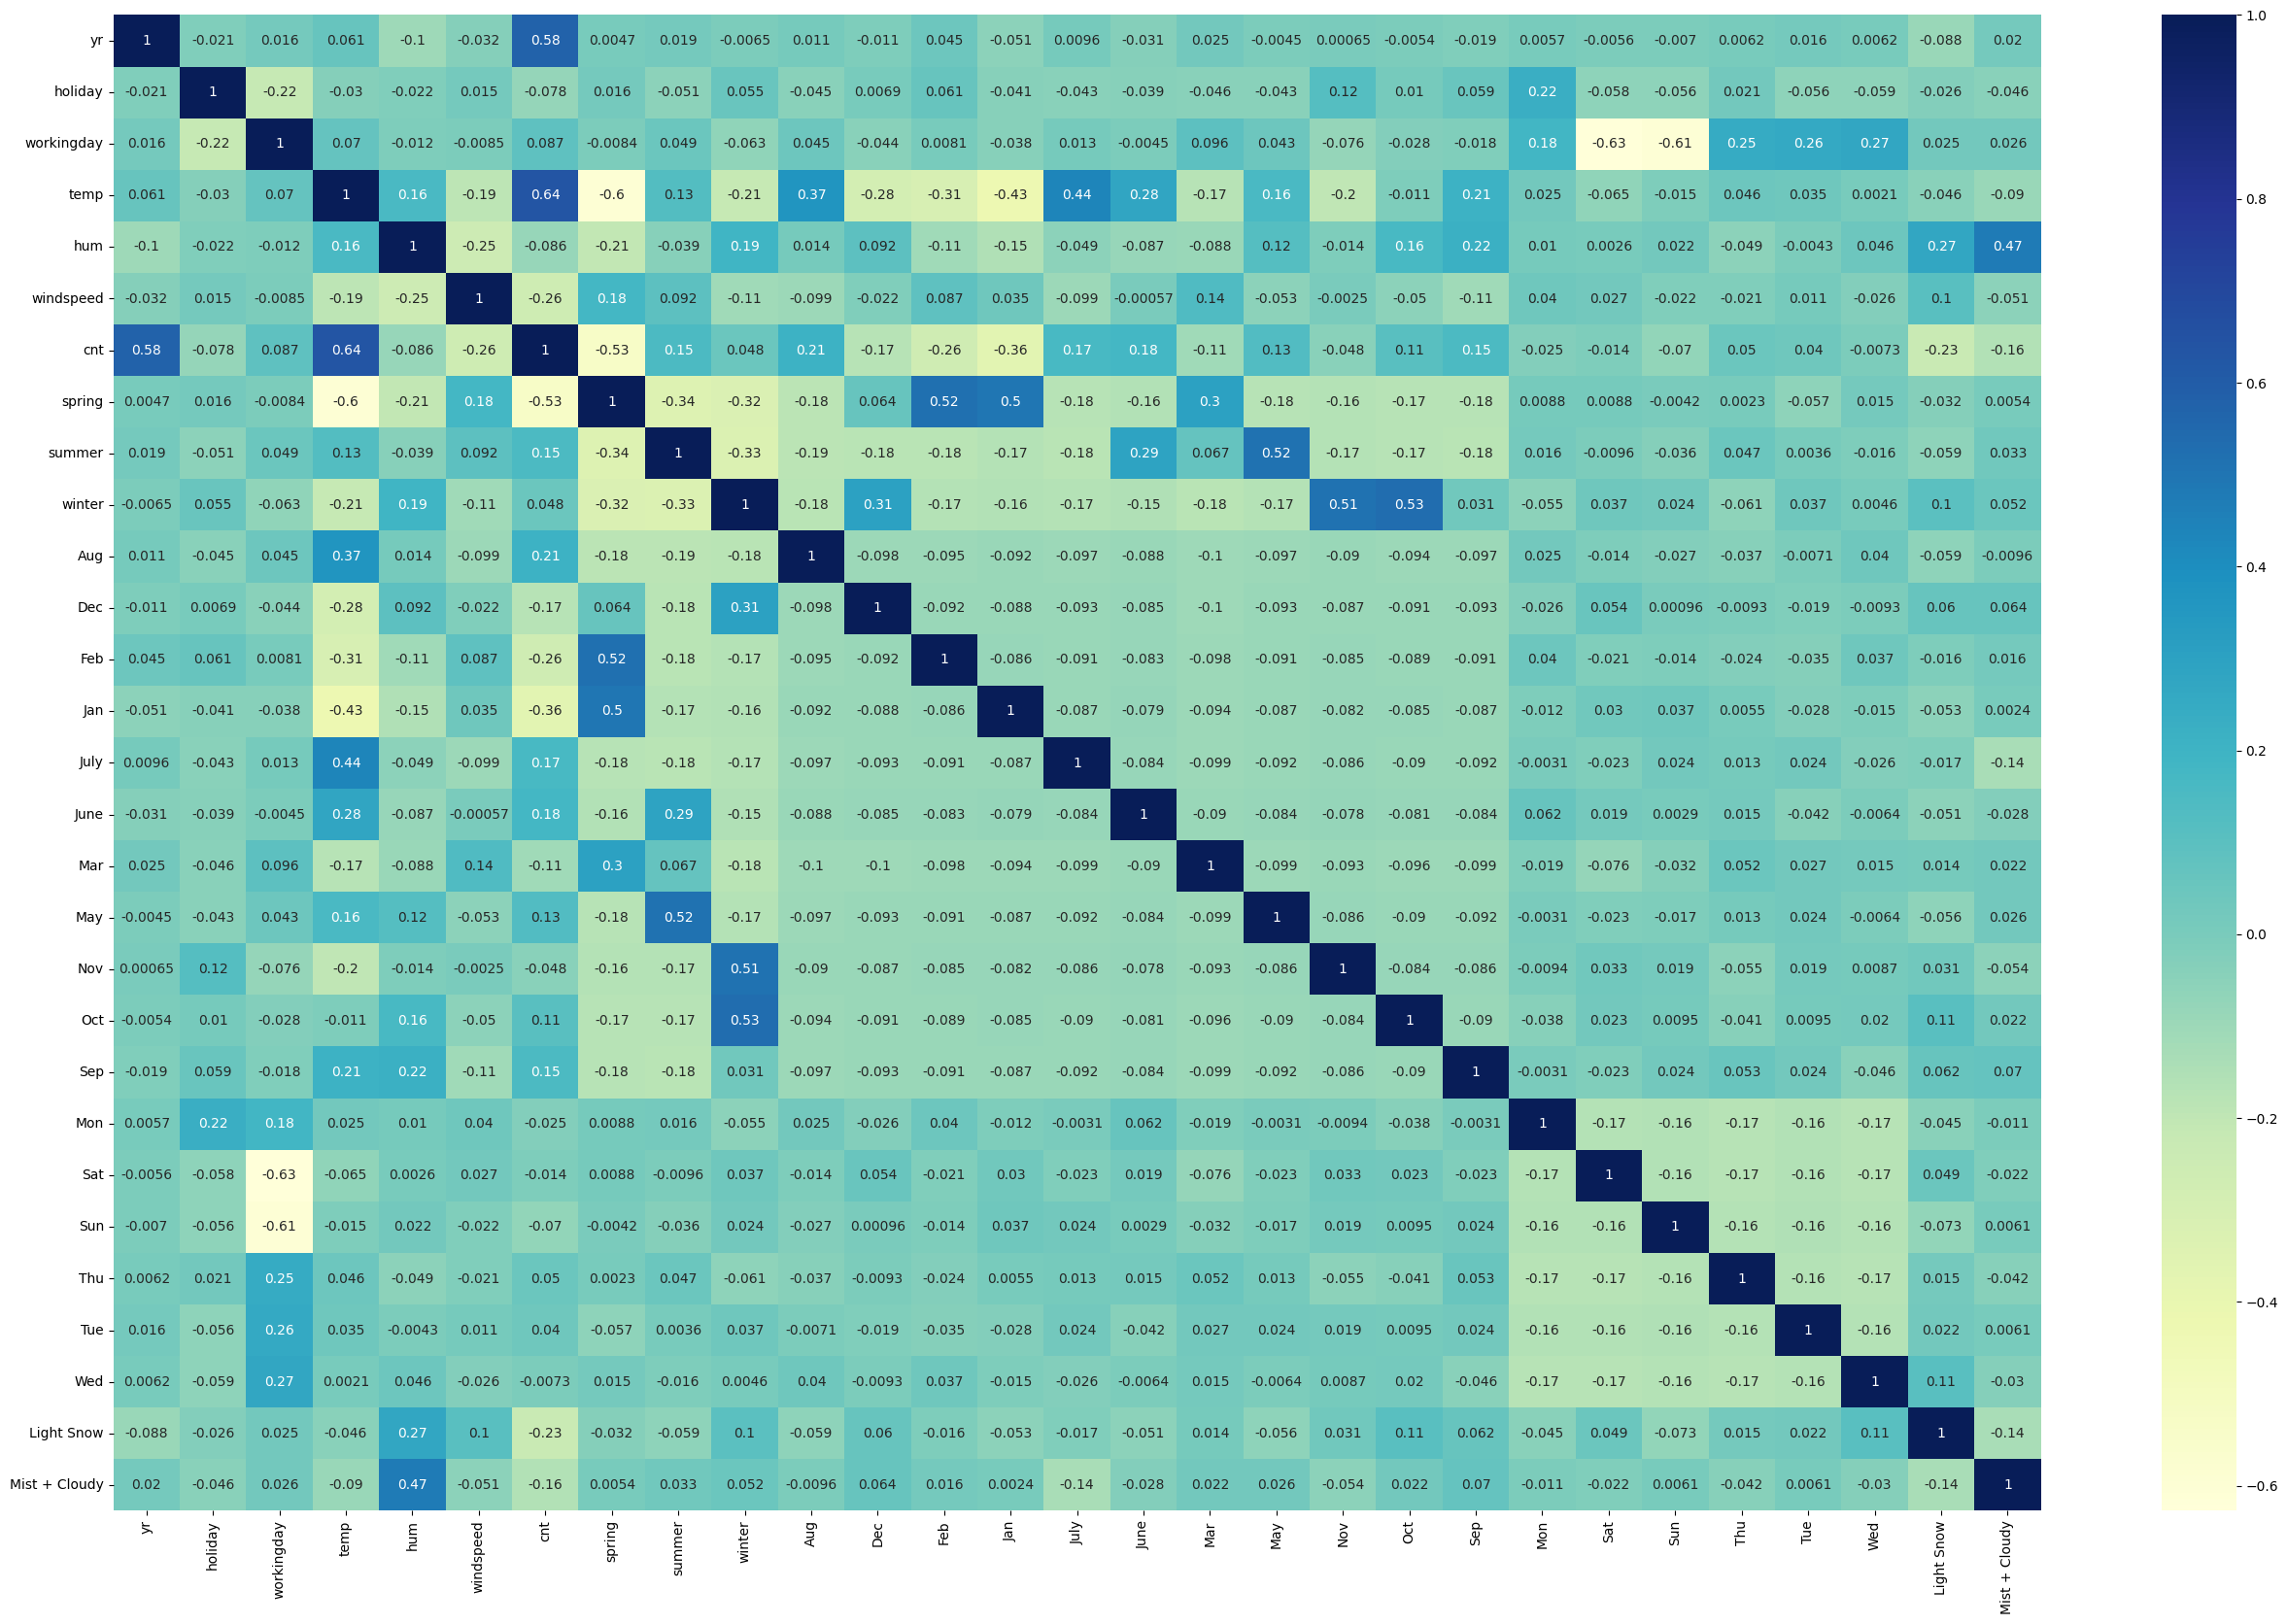

In [30]:
# heatmap
plt.figure(figsize = (32,20))
sns.heatmap(boom_train.corr(),annot = True, cmap ='YlGnBu')
plt.show()

In [31]:
# X_train, y_train

y_train = boom_train.pop('cnt')
X_train = boom_train
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  spring  summer  \
182   0        0           0  0.846320  0.457155   0.221080       0       0   
588   1        0           0  0.799593  0.545416   0.238853       0       0   
57    0        0           0  0.354311  0.699229   0.245380       1       0   
51    0        1           0  0.304288  0.622108   0.680997       1       0   
9     0        0           1  0.114266  0.496573   0.479220       1       0   

     winter  Aug  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Light Snow  \
182       0    0  ...    0    0    0    1    0    0    0    0           0   
588       0    1  ...    0    0    0    0    1    0    0    0           0   
57        0    0  ...    0    0    0    0    1    0    0    0           0   
51        0    0  ...    0    0    1    0    0    0    0    0           0   
9         0    0  ...    0    0    1    0    0    0    0    0           0   

     Mist + Cloudy  
182              0  
588              0  
57               0  
51               1  
9                0  

[5 rows x 28 columns]

In [32]:
y_train.head()

182    0.591098
588    0.770773
57     0.248518
51     0.085235
9      0.112218
Name: cnt, dtype: float64

In [35]:
#modeling up to bottom
# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     105.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          4.87e-183
Time:                        19:50:32   Log-Likelihood:                 495.00
No. Observations:                 510   AIC:                            -934.0
Df Residuals:                     482   BIC:                            -815.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2709      0.039      6.909      0.000       0.194       0.348
yr                0.2523      0.009     29.164      0.000       0.235       0.269
holiday           0.0033      0.028      0.119      0.905      -0.052       0.058
workingday        0.1159      0.014      8.513      0.000       0.089       0.143
temp              0.5252      0.047     11.123      0.000       0.432       0.618
hum              -0.1936      0.041     -4.727      0.000      -0.274      -0.113
windspeed        -0.1599      0.025     -6.385      0.000      -0.209      -0.111
spring           -0.1240      0.032     -3.904      0.000      -0.186      -0.062
summer           -0.0166      0.029     -0.565      0.572      -0.075       0.041
winter            0.0731      0.028      2.624      0.009       0.018       0.128
Aug              -0.0399      0.037     -1.083      0.280      -0.112       0.033
Dec              -0.0498      0.035     -1.428      0.154      -0.118       0.019
Feb              -0.0190      0.034     -0.560      0.576      -0.086       0.048
Jan              -0.0375      0.036     -1.049      0.295      -0.108       0.033
July             -0.1131      0.038     -2.977      0.003      -0.188      -0.038
June              0.0021      0.026      0.083      0.934      -0.048       0.052
Mar               0.0244      0.026      0.936      0.350      -0.027       0.076
May               0.0186      0.022      0.855      0.393      -0.024       0.061
Nov              -0.0645      0.039     -1.668      0.096      -0.141       0.012
Oct               0.0087      0.038      0.230      0.818      -0.065       0.083
Sep               0.0191      0.035      0.550      0.583      -0.049       0.087
Mon              -0.0370      0.016     -2.332      0.020      -0.068      -0.006
Sat               0.1067      0.015      7.022      0.000       0.077       0.137
Sun               0.0450      0.015      2.913      0.004       0.015       0.075
Thu              -0.0162      0.016     -1.039      0.299      -0.047       0.014
Tue              -0.0271      0.016     -1.714      0.087      -0.058       0.004
Wed              -0.0244      0.016     -1.562      0.119      -0.055       0.006
Light Snow       -0.2239      0.027     -8.307      0.000      -0.277      -0.171
Mist + Cloudy    -0.0655      0.011     -5.873      0.000      -0.087      -0.044
==============================================================================
Omnibus:                       88.352   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.999
Skew:                          -0.841   Prob(JB):                     6.30e-54
Kurtosis:                       5.949   Cond. No.                     9.22e+15
================================================================

In [36]:
#calculating the VIF of the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2      workingday  96.45
21            Sat  19.74
22            Sun  18.86
6          spring  10.88
7          summer   9.49
8          winter   8.02
9             Aug   6.52
3            temp   6.50
13           July   6.39
18            Oct   6.03
17            Nov   5.92
10            Dec   5.51
19            Sep   5.32
12            Jan   5.18
11            Feb   5.01
1         holiday   3.86
15            Mar   3.39
14           June   2.47
16            May   2.10
4             hum   2.10
20            Mon   1.77
25            Wed   1.75
23            Thu   1.74
24            Tue   1.68
27  Mist + Cloudy   1.63
26     Light Snow   1.34
5       windspeed   1.22
0              yr   1.07

- Noticed that there are various varible with high p-value and VIF which needs to be removed thus using RFE for choosing the appropiate variables

In [41]:
#RFE
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 10
rfe = RFE(lm, n_features_to_select = 10)

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 5),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('July', True, 1),
 ('June', False, 19),
 ('Mar', False, 11),
 ('May', False, 13),
 ('Nov', False, 2),
 ('Oct', False, 18),
 ('Sep', False, 17),
 ('Mon', False, 10),
 ('Sat', False, 3),
 ('Sun', False, 12),
 ('Thu', False, 16),
 ('Tue', False, 14),
 ('Wed', False, 15),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [43]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'July',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [44]:
true_rfe = X_train.columns[rfe.support_]
true_rfe = X_train.columns[rfe.support_]


Model building using RFE suggested variables

In [45]:
X_train_rfe = X_train[true_rfe]


In [46]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.315519
yr               0.251410
holiday         -0.121749
temp             0.573850
hum             -0.194655
windspeed       -0.154546
spring          -0.113872
winter           0.065029
July            -0.113528
Light Snow      -0.207552
Mist + Cloudy   -0.060044
dtype: float64

In [47]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.2
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.00e-189
Time:                        20:28:20   Log-Likelihood:                 465.89
No. Observations:                 510   AIC:                            -909.8
Df Residuals:                     499   BIC:                            -863.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3155      0.034      9.309      0.000       0.249       0.382
yr                0.2514      0.009     28.366      0.000       0.234       0.269
holiday          -0.1217      0.032     -3.864      0.000      -0.184      -0.060
temp              0.5738      0.032     17.900      0.000       0.511       0.637
hum              -0.1947      0.041     -4.800      0.000      -0.274      -0.115
windspeed        -0.1545      0.026     -6.056      0.000      -0.205      -0.104
spring           -0.1139      0.015     -7.348      0.000      -0.144      -0.083
winter            0.0650      0.013      4.910      0.000       0.039       0.091
July             -0.1135      0.018     -6.408      0.000      -0.148      -0.079
Light Snow       -0.2076      0.028     -7.540      0.000      -0.262      -0.153
Mist + Cloudy    -0.0600      0.011     -5.280      0.000      -0.082      -0.038
==============================================================================
Omnibus:                       70.127   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.293
Skew:                          -0.721   Prob(JB):                     7.76e-37
Kurtosis:                       5.397   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#calculating the VIF of the model
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3            hum  21.90
2           temp  14.50
4      windspeed   4.78
5         spring   2.44
9  Mist + Cloudy   2.28
6         winter   1.96
0             yr   1.92
7           July   1.40
8     Light Snow   1.25
1        holiday   1.03

analysing the columns to be droped
- High p-value, high VIF : definitely drop

High-Low:
- High p, low VIF : remove these first, then build model again and check VIF again
- Low p, high VIF : remove these later
- Low p-value, low VIF : keep variable

In [49]:
# removing hum due to very high vif
XX_old = X_train_rfe
XX = XX_old.drop(['hum'], axis = 1)


In [50]:
#adding constant to training variable
XX = sm.add_constant(XX)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, XX)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.208951
yr               0.257298
holiday         -0.123426
temp             0.537800
windspeed       -0.122168
spring          -0.116936
winter           0.054065
July            -0.105295
Light Snow      -0.264270
Mist + Cloudy   -0.091361
dtype: float64

In [51]:
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          4.43e-186
Time:                        20:49:24   Log-Likelihood:                 454.38
No. Observations:                 510   AIC:                            -888.8
Df Residuals:                     500   BIC:                            -846.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2090      0.026      7.985      0.000       0.158       0.260
yr                0.2573      0.009     28.687      0.000       0.240       0.275
holiday          -0.1234      0.032     -3.834      0.000      -0.187      -0.060
temp              0.5378      0.032     16.887      0.000       0.475       0.600
windspeed        -0.1222      0.025     -4.858      0.000      -0.172      -0.073
spring           -0.1169      0.016     -7.391      0.000      -0.148      -0.086
winter            0.0541      0.013      4.056      0.000       0.028       0.080
July             -0.1053      0.018     -5.844      0.000      -0.141      -0.070
Light Snow       -0.2643      0.025    -10.403      0.000      -0.314      -0.214
Mist + Cloudy    -0.0914      0.010     -9.600      0.000      -0.110      -0.073
==============================================================================
Omnibus:                       69.553   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.600
Skew:                          -0.725   Prob(JB):                     1.34e-35
Kurtosis:                       5.336   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#calculating the VIF of the model

XX = XX.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2           temp  4.70
3      windspeed  4.68
0             yr  1.91
4         spring  1.72
8  Mist + Cloudy  1.56
5         winter  1.40
6           July  1.36
7     Light Snow  1.09
1        holiday  1.03

VIF and p-values are under acceptable limits now

step 4: residual analysis


In [53]:
XX = sm.add_constant(XX)
XX


const  yr  holiday      temp  windspeed  spring  winter  July  \
182    1.0   0        0  0.846320   0.221080       0       0     1   
588    1.0   1        0  0.799593   0.238853       0       0     0   
57     1.0   0        0  0.354311   0.245380       1       0     0   
51     1.0   0        1  0.304288   0.680997       1       0     0   
9      1.0   0        0  0.114266   0.479220       1       0     0   
..     ...  ..      ...       ...        ...     ...     ...   ...   
705    1.0   1        0  0.326094   0.258148       0       1     0   
313    1.0   0        0  0.399819   0.397631       0       1     0   
161    1.0   0        0  0.829706   0.316000       0       0     0   
164    1.0   0        0  0.679142   0.588999       0       0     0   
216    1.0   0        0  0.812053   0.387203       0       0     0   

     Light Snow  Mist + Cloudy  
182           0              0  
588           0              0  
57            0              0  
51            0              1  
9             0              0  
..          ...            ...  
705           0              1  
313           0              1  
161           0              0  
164           0              0  
216           0              0  

[510 rows x 10 columns]

In [54]:
y_train_pred = lr_model.predict(XX)


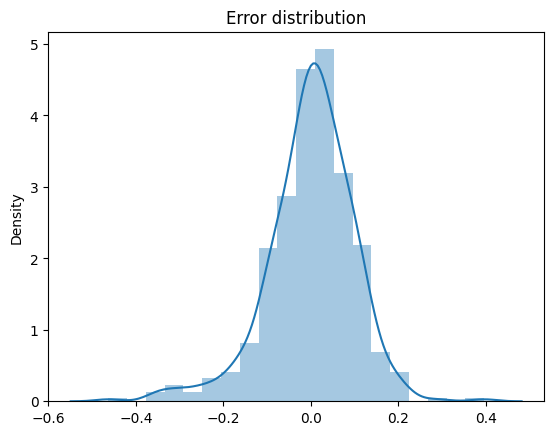

In [55]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res,bins =20)
plt.title('Error distribution')
plt.show()

Error distribution is centre at zero

Making predictions

In [60]:
#Apply scaling on test set
boom_test[num_var] = scaler.transform(boom_test[num_var])


In [61]:
boom_test.head()


yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
360   0        0           1  0.331287  0.784062   0.396159  0.092170       1   
633   1        0           1  0.717562  0.648671   0.529636  0.920691       0   
259   0        0           0  0.538962  0.738646   0.399081  0.514437       0   
532   1        0           0  0.664605  0.615681   0.292273  0.825495       0   
126   0        0           0  0.574266  0.556555   0.329360  0.540033       0   

     summer  winter  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Light Snow  \
360       0       0  ...    0    0    0    0    0    0    1    0           0   
633       0       1  ...    0    1    0    0    0    0    0    1           0   
259       0       0  ...    0    1    0    1    0    0    0    0           0   
532       1       0  ...    0    0    0    0    1    0    0    0           0   
126       1       0  ...    0    0    0    1    0    0    0    0           0   

     Mist + Cloudy  
360              1  
633              0  
259              1  
532              0  
126              0  

[5 rows x 29 columns]

In [62]:
boom_test.describe()


yr     holiday  workingday        temp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.566210    0.050228    0.639269    0.548531    0.640886    0.393053   
std      0.496732    0.218916    0.481313    0.234529    0.142751    0.187642   
min      0.000000    0.000000    0.000000    0.085192    0.193231    0.057872   
25%      0.000000    0.000000    0.000000    0.339593    0.544503    0.272980   
50%      1.000000    0.000000    1.000000    0.552460    0.643102    0.359033   
75%      1.000000    0.000000    1.000000    0.748713    0.745119    0.472539   
max      1.000000    1.000000    1.000000    0.984424    0.989717    1.157215   

              cnt      spring      summer      winter  ...         Oct  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.539675    0.237443    0.242009    0.260274  ...    0.095890   
std      0.250014    0.426491    0.429281    0.439789  ...    0.295115   
min     -0.051570    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.364330    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.540033    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.737675    0.000000    0.000000    1.000000  ...    0.000000   
max      1.044383    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun         Thu         Tue  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.077626    0.146119    0.146119    0.164384    0.132420    0.155251   
std      0.268194    0.354034    0.354034    0.371472    0.339723    0.362974   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed  Light Snow  Mist + Cloudy  
count  219.000000  219.000000     219.000000  
mean     0.127854    0.018265       0.292237  
std      0.334692    0.134214       0.455833  
min      0.000000    0.000000       0.000000  
25%      0.000000    0.000000       0.000000  
50%      0.000000    0.000000       0.000000  
75%      0.000000    0.000000       1.000000  
max      1.000000    1.000000       1.000000  

[8 rows x 29 columns]

In [63]:
# spliting into X and y test
y_test = boom_test.pop('cnt')
X_test = boom_test

In [64]:
y_test.head()


360    0.092170
633    0.920691
259    0.514437
532    0.825495
126    0.540033
Name: cnt, dtype: float64

In [65]:
X_test.head()


yr  holiday  workingday      temp       hum  windspeed  spring  summer  \
360   0        0           1  0.331287  0.784062   0.396159       1       0   
633   1        0           1  0.717562  0.648671   0.529636       0       0   
259   0        0           0  0.538962  0.738646   0.399081       0       0   
532   1        0           0  0.664605  0.615681   0.292273       0       1   
126   0        0           0  0.574266  0.556555   0.329360       0       1   

     winter  Aug  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Light Snow  \
360       0    0  ...    0    0    0    0    0    0    1    0           0   
633       1    0  ...    0    1    0    0    0    0    0    1           0   
259       0    0  ...    0    1    0    1    0    0    0    0           0   
532       0    0  ...    0    0    0    0    1    0    0    0           0   
126       0    0  ...    0    0    0    1    0    0    0    0           0   

     Mist + Cloudy  
360              1  
633              0  
259              1  
532              0  
126              0  

[5 rows x 28 columns]

In [66]:
# using the model to make pridection

#droping the constant
XX.drop(columns= 'const', inplace = True)

In [67]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[XX.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)


In [68]:
#making predictions
y_pred = lr_model.predict(X_test_new)


In [69]:
y_pred


360    0.130423
633    0.841515
259    0.358690
532    0.787968
126    0.477555
         ...   
571    0.765311
590    0.870808
549    0.693939
189    0.513044
297    0.497421
Length: 219, dtype: float64

model eveluation


In [70]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
r2_test


0.796712748311015

In [71]:
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
r2_train

0.8300384458071906

we noticed the r2 score has increased for training set


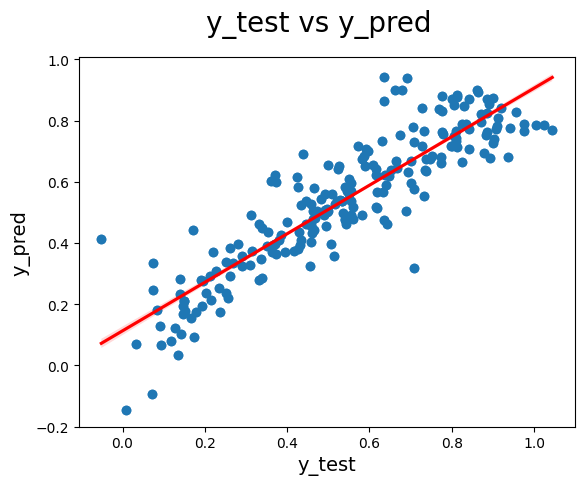

In [72]:
# Plotting y_test and y_pred

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 14)
plt.show()

- Final equation

 cnt = 0.2573×yr - 0.1234×holiday + 0.5378×temp - 0.1222×windspeed - 0.1169×spring - 0.0541×winter - 0.1053×july - 0.2643×LightSnow - 0.0914×MistCloudy

In [73]:
#finding out the mean squared error

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.009855052693847817
Mean squared error of the test set is 0.01264881130020107


The errors are close to zero, hence our model stands true

- Conclusion

Temperature plas a major role in bike renting, book bike can opt to maximise the operation in the area where weather is majorly pleasent

In rainy season there is no business

Snow, windspeed, and spring season negatively impact the business

Sep month is the month of maximum business


